# Part - 1 Exploratory Data Analysis

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
train = "drive/MyDrive/training_data.csv"

In [ ]:
df = pd.read_csv(train)

In [ ]:
df

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3545,3.2375,5,6.028881,1.051118,4660.0,2.717201,38.10,-122.14,1.924
1,36760,4.5500,18,6.091451,1.030581,1623.0,3.330014,34.37,-118.52,1.991
2,29301,6.0743,16,6.394805,1.027350,1574.0,3.091451,34.11,-117.80,2.610
3,285,3.6875,15,5.164835,1.056911,616.0,2.737892,38.49,-122.59,1.917
4,30757,6.1273,11,6.256544,1.029503,7777.0,2.383468,34.19,-118.64,2.915
...,...,...,...,...,...,...,...,...,...,...
29704,29280,4.6923,34,6.062972,1.091743,1198.0,2.746992,38.12,-122.17,1.617
29705,36351,3.1553,27,4.955882,1.002101,2048.0,2.433628,34.10,-117.18,1.516
29706,24915,2.4844,16,5.415350,1.069140,1446.0,3.050691,37.95,-121.31,1.143
29707,28148,5.1072,23,5.948012,1.003058,1497.0,3.111888,37.95,-121.98,2.213


In [ ]:
df.describe()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000,29709.000000
mean,18603.548016,3.854474,26.084856,5.165188,1.062142,1664.366523,2.833073,35.574937,-119.559416,2.077761
std,10733.967318,1.808813,12.162222,1.194982,0.096120,1311.036683,2.999188,2.083048,1.975349,1.157184
min,1.000000,0.499900,2.000000,0.851064,0.500000,3.000000,0.950000,32.550000,-124.350000,0.149990
25%,9310.000000,2.600000,17.000000,4.359797,1.020216,950.000000,2.392789,33.930000,-121.800000,1.206000
50%,18611.000000,3.517900,25.000000,5.070281,1.054475,1383.000000,2.744425,34.190000,-118.450000,1.807000
75%,27928.000000,4.700000,35.000000,5.865672,1.088657,1858.000000,3.122137,37.700000,-118.020000,2.660000
max,37136.000000,15.000100,52.000000,23.891566,5.873181,35682.000000,502.990610,41.950000,-114.550000,5.000010


In [ ]:
df.dtypes

id               int64
MedInc         float64
HouseAge         int64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

In [ ]:
df.columns

Index(['id', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedHouseVal'],
      dtype='object')

In [ ]:
df.shape

(29709, 10)

### Missing Values

In [ ]:
df.isnull().sum()

id             0
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

### Outlier Detection and Correlation

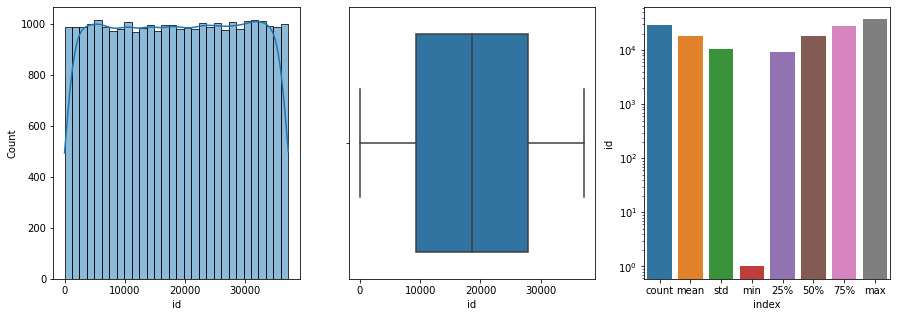

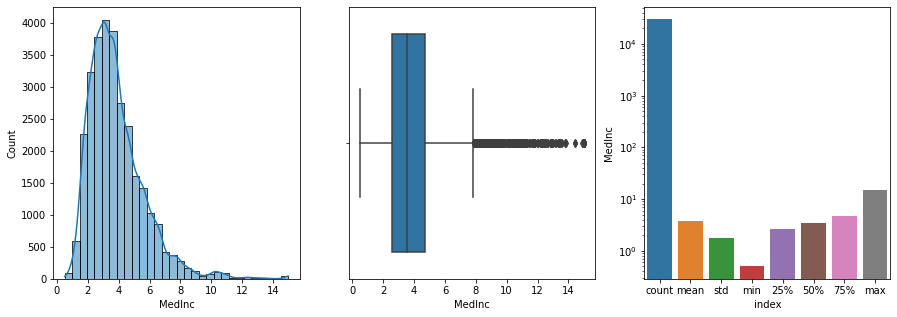

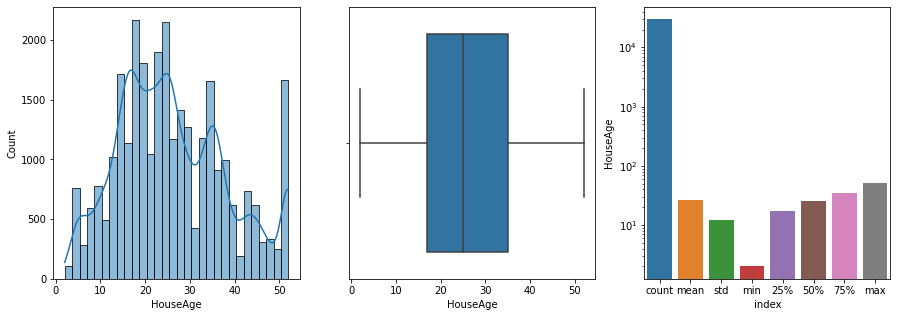

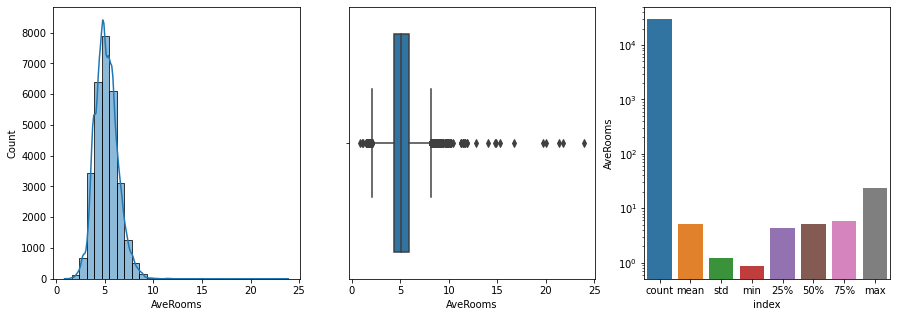

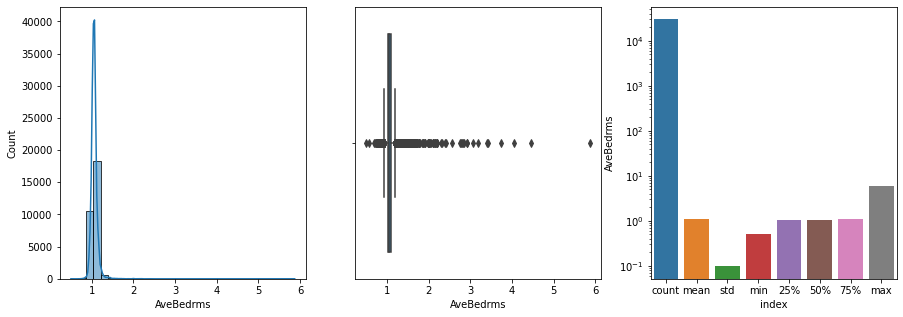

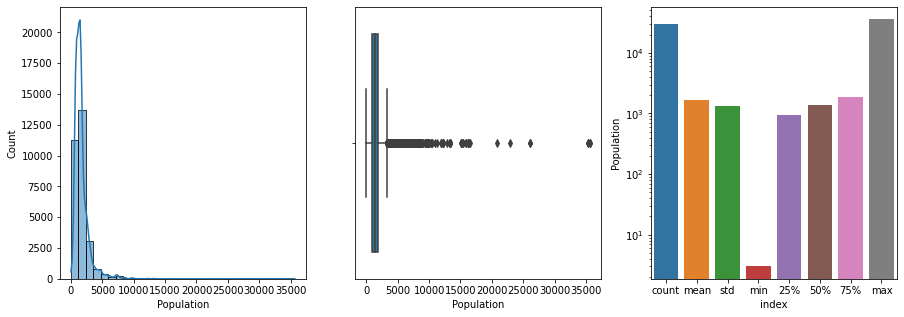

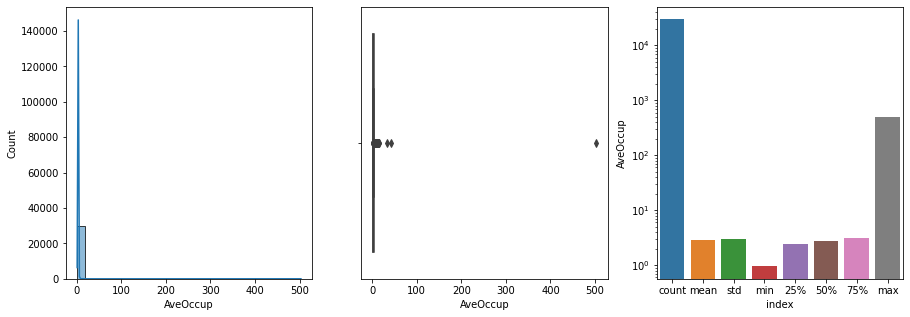

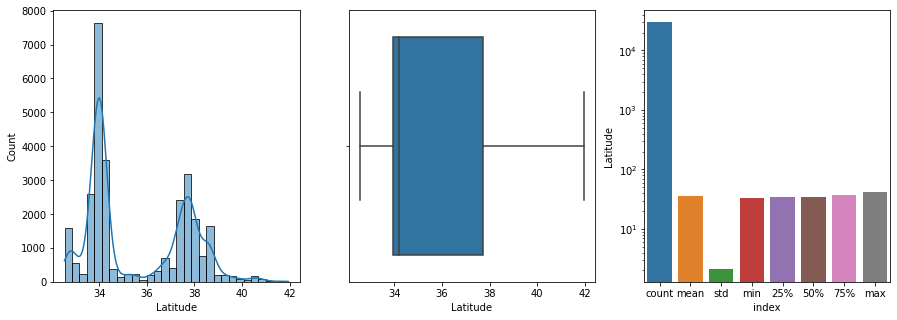

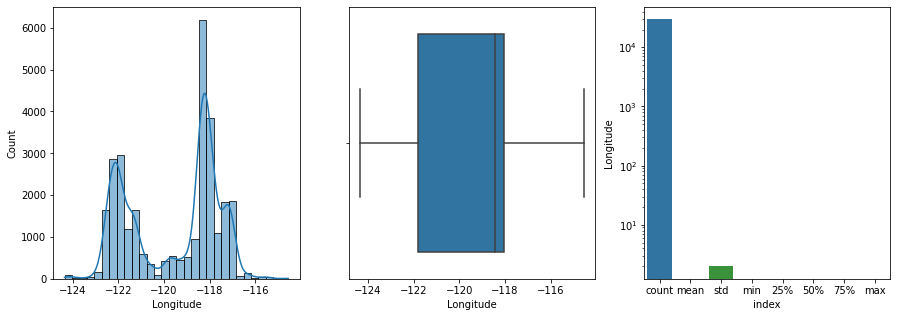

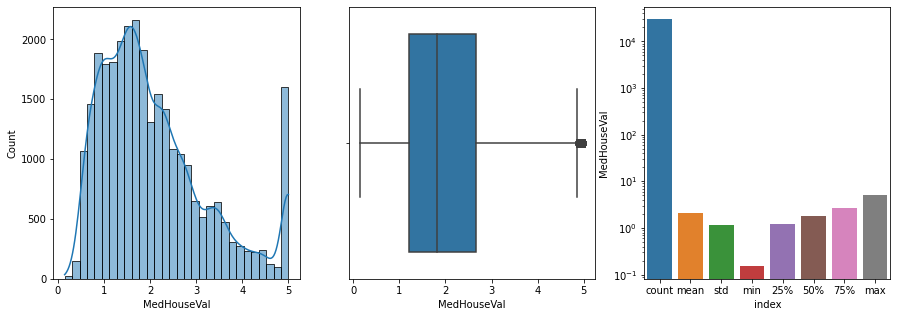

In [ ]:
for col in df:
    fig, axs = plt.subplots(1,3,figsize=(15,5))
    sns.histplot(data=df, x=col, bins=30, kde=True,ax = axs[0])
    sns.boxplot(x=df[col], ax=axs[1])
    g=sns.barplot(data= df[col].describe().reset_index(), x='index', y=col, ax=axs[2])
    g.set_yscale("log")

In [ ]:
df.loc[df['Population']>30000]

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3516,7106,3.6369,19,6.314565,1.262003,35375.0,2.845938,34.10,-117.81,1.625
19068,20184,3.6413,22,4.937677,1.045658,35682.0,2.769424,34.29,-118.75,2.225
19615,2709,2.3221,10,3.899811,1.058722,35400.0,2.471098,38.02,-121.85,1.125
25660,24290,1.9688,23,3.285714,1.082729,35682.0,2.590476,34.08,-118.29,2.250


In [ ]:
df.loc[df['AveBedrms']>4]

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
3285,3340,6.2547,25,21.397436,4.461538,181.0,2.769231,37.35,-120.57,1.676
7923,3056,1.7188,17,21.805654,4.038462,102.0,2.441558,39.14,-116.90,0.722
10664,4680,1.6607,26,23.891566,5.873181,849.0,2.793651,38.96,-122.64,0.903


In [ ]:
df.loc[df['AveOccup']>100].index

Int64Index([26142], dtype='int64')

In [ ]:
df.drop(df.index[26142])

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,3545,3.2375,5,6.028881,1.051118,4660.0,2.717201,38.10,-122.14,1.924
1,36760,4.5500,18,6.091451,1.030581,1623.0,3.330014,34.37,-118.52,1.991
2,29301,6.0743,16,6.394805,1.027350,1574.0,3.091451,34.11,-117.80,2.610
3,285,3.6875,15,5.164835,1.056911,616.0,2.737892,38.49,-122.59,1.917
4,30757,6.1273,11,6.256544,1.029503,7777.0,2.383468,34.19,-118.64,2.915
...,...,...,...,...,...,...,...,...,...,...
29704,29280,4.6923,34,6.062972,1.091743,1198.0,2.746992,38.12,-122.17,1.617
29705,36351,3.1553,27,4.955882,1.002101,2048.0,2.433628,34.10,-117.18,1.516
29706,24915,2.4844,16,5.415350,1.069140,1446.0,3.050691,37.95,-121.31,1.143
29707,28148,5.1072,23,5.948012,1.003058,1497.0,3.111888,37.95,-121.98,2.213


In [ ]:
df.loc[df['MedHouseVal']>=5]

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5,14596,7.8750,32,6.397590,1.057831,1041.0,2.518717,33.61,-117.96,5.00001
10,31664,8.5184,28,6.940945,1.048565,1533.0,2.548035,33.60,-117.87,5.00001
12,22310,6.7718,24,6.141975,1.064516,1092.0,2.822086,37.74,-122.49,5.00001
53,29807,5.7485,33,7.281818,1.072727,593.0,2.704545,38.55,-122.55,5.00001
57,4355,9.2590,34,7.911111,0.984127,761.0,3.000000,33.97,-118.42,5.00001
...,...,...,...,...,...,...,...,...,...,...
29540,2806,7.6917,23,7.711388,1.057878,1929.0,2.787770,34.02,-118.58,5.00001
29543,19376,9.0376,35,7.416667,0.966667,676.0,2.800000,37.37,-122.09,5.00001
29592,33160,9.1198,15,9.361702,1.092593,1188.0,3.073684,33.72,-118.04,5.00001
29649,14498,1.8977,28,2.957746,1.126437,983.0,1.741803,34.02,-118.44,5.00001


In [ ]:
df.loc[(df['MedInc']>5.5) & (df['MedHouseVal']>=5)]  ## we cant consider as

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
5,14596,7.8750,32,6.397590,1.057831,1041.0,2.518717,33.61,-117.96,5.00001
10,31664,8.5184,28,6.940945,1.048565,1533.0,2.548035,33.60,-117.87,5.00001
12,22310,6.7718,24,6.141975,1.064516,1092.0,2.822086,37.74,-122.49,5.00001
53,29807,5.7485,33,7.281818,1.072727,593.0,2.704545,38.55,-122.55,5.00001
57,4355,9.2590,34,7.911111,0.984127,761.0,3.000000,33.97,-118.42,5.00001
...,...,...,...,...,...,...,...,...,...,...
29539,19985,7.4678,43,6.452261,1.057789,1151.0,2.886935,37.48,-122.27,5.00001
29540,2806,7.6917,23,7.711388,1.057878,1929.0,2.787770,34.02,-118.58,5.00001
29543,19376,9.0376,35,7.416667,0.966667,676.0,2.800000,37.37,-122.09,5.00001
29592,33160,9.1198,15,9.361702,1.092593,1188.0,3.073684,33.72,-118.04,5.00001


The only outlier which is not required and is inducing an error is in Avg Occp. So removed that row.

The removal of other outliers may cause loss of information, so keeping it as it is.

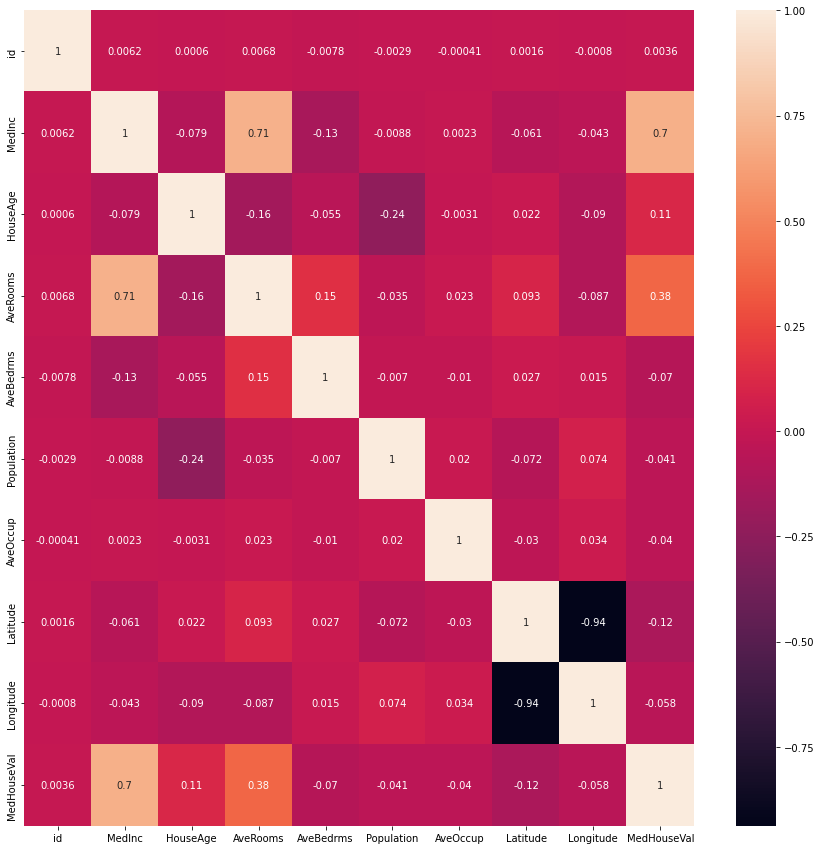

In [ ]:
plt.figure(figsize= (15, 15))
sns.heatmap(df.corr(), annot=True)

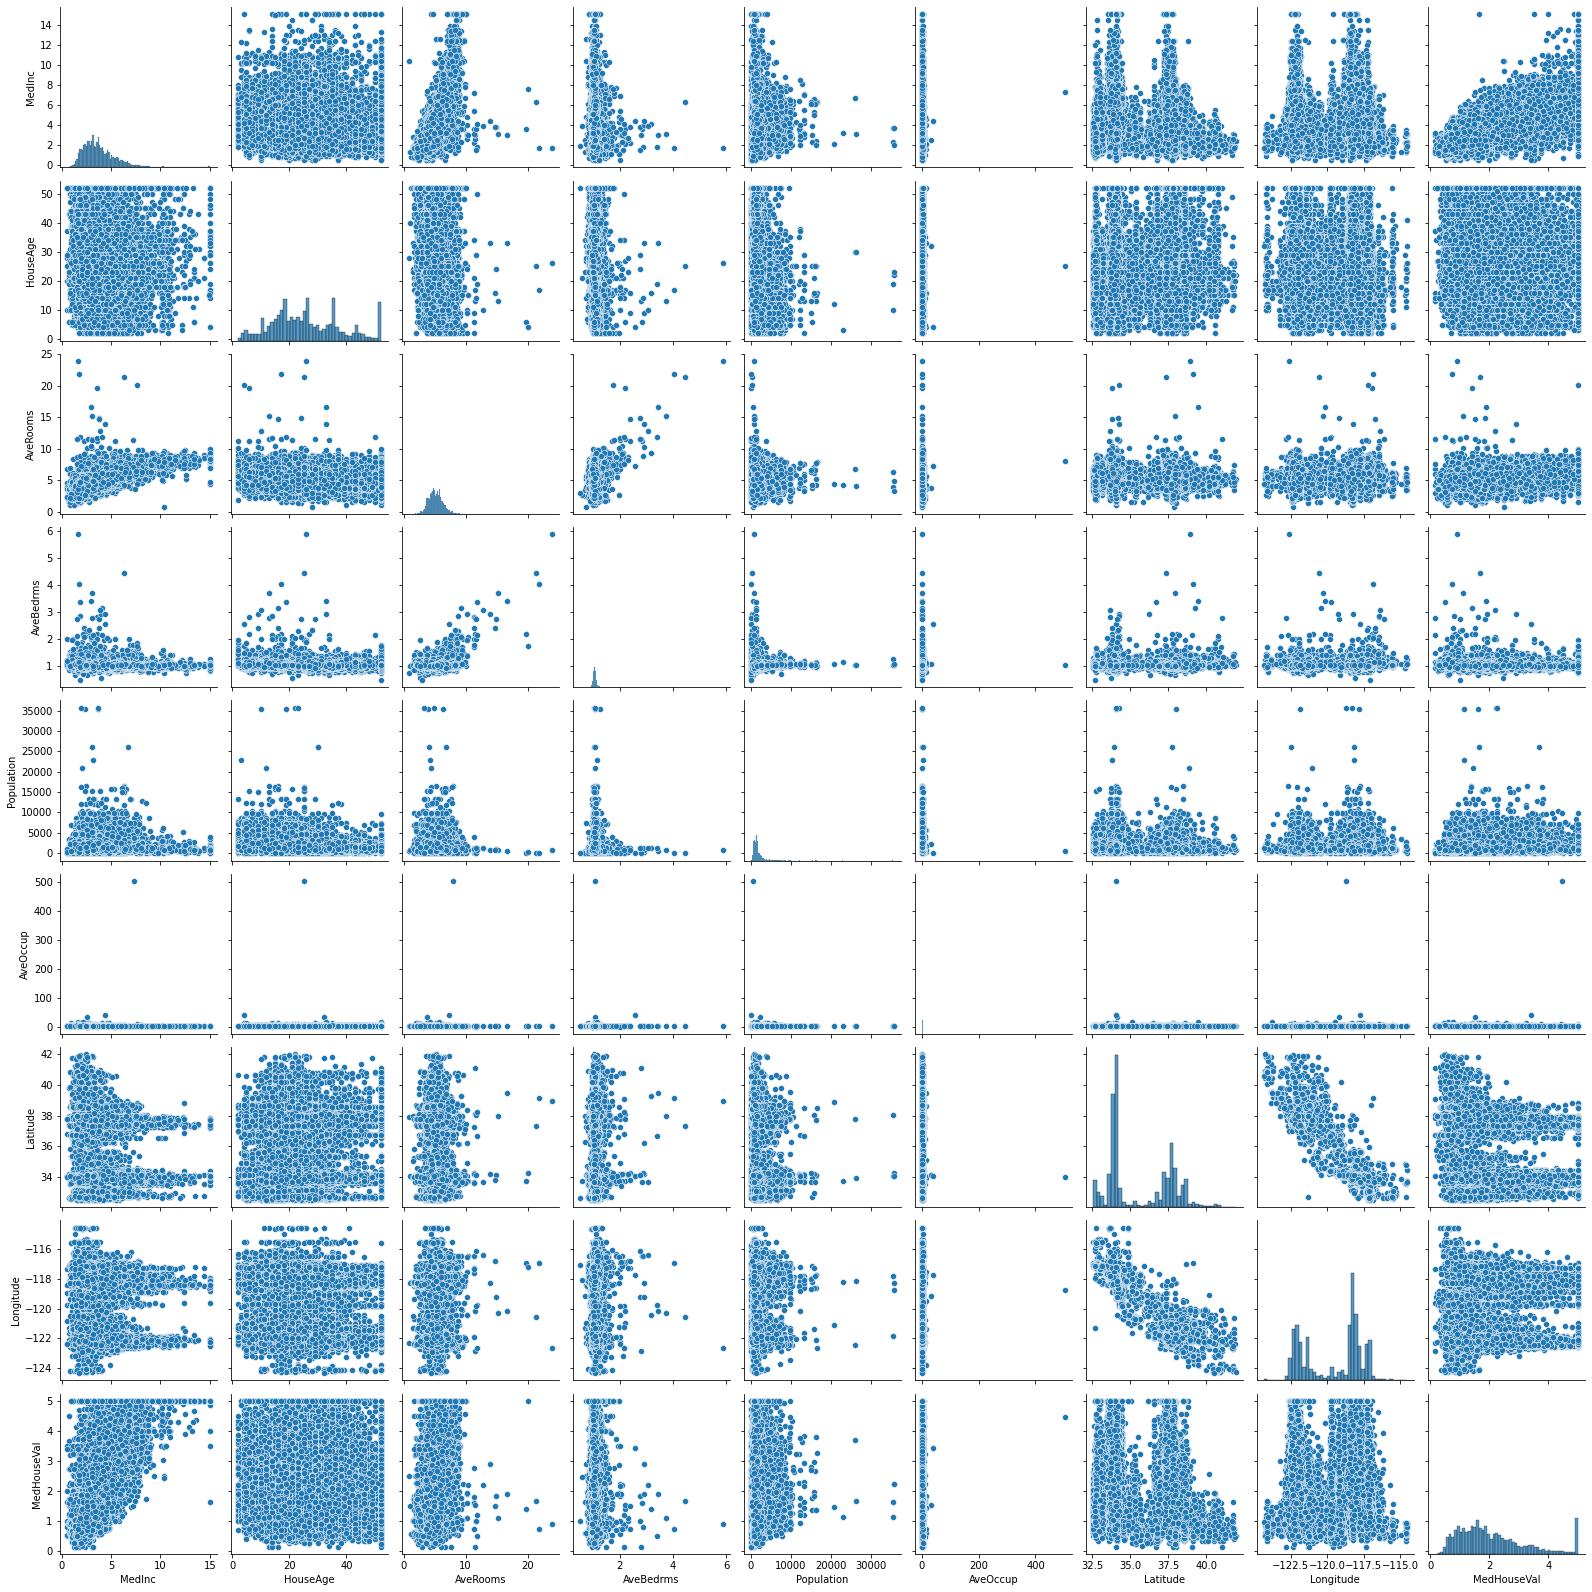

In [ ]:
sns.pairplot(df.drop(['id'], axis=1))

In [ ]:
def compute_correlations_price_ratio(dataset):
  correlations = dataset.corr()
  res = correlations["MedHouseVal"].abs().sort_values(ascending=False)
  print(res)
compute_correlations_price_ratio(df)

MedHouseVal    1.000000
MedInc         0.704028
AveRooms       0.375579
Latitude       0.115245
HouseAge       0.107566
AveBedrms      0.070251
Longitude      0.058383
Population     0.041187
AveOccup       0.040074
id             0.003552
Name: MedHouseVal, dtype: float64


From above graph we can observe that MedInc, AveRooms, HouseAge, AveBedrms are positively corelated and latitute is negatively corelated

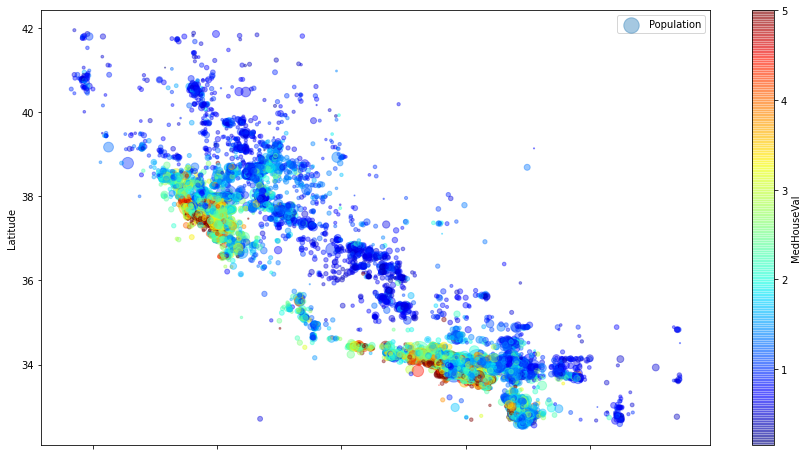

In [ ]:
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4,
        s=df["Population"]/75, label="Population", figsize=(15,8),
        c="MedHouseVal", cmap=plt.get_cmap("jet"),colorbar=True,)

# Splitting the data

In [ ]:
y=df['MedHouseVal']
x=df.drop(['MedHouseVal','id'],axis=1)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.2, random_state=121)

In [ ]:
sc= StandardScaler()
train_x=sc.fit_transform(train_x)
test_x=sc.transform(test_x)

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model_1 = LinearRegression()

In [ ]:
model_1.fit(train_x,train_y)

LinearRegression()

In [ ]:
test_pred_1=model_1.predict(test_x)

In [ ]:
mse_1 = mean_squared_error(test_y, test_pred_1)
rmse_1 = math.sqrt(mse_1)

In [ ]:
rmse_1

0.7290447086112398

In [ ]:
pd.DataFrame({'actual': train_y, 'predicted': model_1.predict(train_x)})

,actual,predicted
3799,2.53600,1.851950
20158,1.04200,1.239838
2743,1.49100,1.538510
14689,1.53800,1.315410
14791,1.65000,1.553780
...,...,...
28148,5.00001,7.259748
26207,5.00000,3.810767
23816,3.34700,2.603288
4565,2.76600,1.562007


###  Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model_2 = Ridge()

In [ ]:
model_2.fit(train_x,train_y)

Ridge()

In [ ]:
test_pred_2=model_2.predict(test_x)

In [ ]:
mse_2 = mean_squared_error(test_y, test_pred_2)
rmse_2 = math.sqrt(mse_2)

In [ ]:
rmse_2

0.7290392659640772

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model_3 = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 5, random_state=121, min_samples_split = 20)

In [ ]:
model_3.fit(train_x,train_y)

DecisionTreeRegressor(max_depth=5, min_samples_split=20, random_state=121)

In [ ]:
test_pred_3=model_3.predict(test_x)

In [ ]:
mse_3 = mean_squared_error(test_y, test_pred_3)
rmse_3 = math.sqrt(mse_3)

In [ ]:
rmse_3

0.7278789058090187

### SVM Regressor

In [ ]:
from sklearn.svm import SVR

In [ ]:
model_4 = SVR()

In [ ]:
model_4.fit(train_x,train_y)

SVR()

In [ ]:
test_pred_4=model_4.predict(test_x)

In [ ]:
mse_4 = mean_squared_error(test_y, test_pred_4)
rmse_4 = math.sqrt(mse_4)

In [ ]:
rmse_4

0.6456532056999144

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor as RFR

In [ ]:
#model_5 = RFR(n_estimators=6, max_depth=6, min_samples_split=1000, min_samples_leaf=750, max_leaf_nodes=12)

In [ ]:
model_5 = RFR(random_state=121)

In [ ]:
model_5.fit(train_x,train_y)

RandomForestRegressor(random_state=121)

In [ ]:
test_pred_5=model_5.predict(test_x)

In [ ]:
mse_5 = mean_squared_error(test_y, test_pred_5)
rmse_5 = math.sqrt(mse_5)

In [ ]:
rmse_5

0.5985017730727807

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators':[5,10,50,100],
    'max_depth': [4,6,8,10],
    'max_features': [8],
    'min_samples_leaf':[5,10,20,30]
}

In [ ]:
model_5_G = GridSearchCV(
    estimator=model_5, param_grid=param_grid, scoring='neg_mean_squared_error',
    n_jobs=-1, cv=6, refit=True, return_train_score=True
)

In [ ]:
model_5_G.fit(train_x, train_y)

GridSearchCV(cv=6, estimator=RandomForestRegressor(random_state=121), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 8, 10], 'max_features': [8],
                         'min_samples_leaf': [5, 10, 20, 30],
                         'n_estimators': [5, 10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
test_pred_5G=model_5_G.predict(test_x)

In [ ]:
model_5_G.cv_results_

{'mean_fit_time': array([ 0.34393624,  0.76216757,  4.03618352,  6.66369029,  0.29139574,
         0.59530759,  3.7077295 ,  6.61296773,  0.60454154,  0.97280542,
         2.89870512,  7.37571971,  0.29477584,  0.58333147,  3.65481853,
         6.55088524,  0.41562132,  0.97926565,  4.86384324,  9.74754008,
         0.81206314,  1.06819808,  4.89134697,  9.78988254,  0.42785267,
         0.82074396,  4.87568577,  9.73833323,  0.41056101,  0.84057562,
         4.89563525,  9.79409464,  0.89338803,  1.44054413,  6.15162861,
        12.70402996,  0.57294567,  1.04800741,  6.03508619, 12.75886408,
         0.51460401,  1.03935556,  5.93056516, 12.5415688 ,  0.50796052,
         1.02785075,  6.14399628, 12.17679326,  0.6321499 ,  1.25848627,
         7.79639379, 14.8482184 ,  0.62129398,  1.2550023 ,  7.71371202,
        14.50868209,  0.58480597,  1.19179281,  7.49925164, 13.32655406,
         1.00064083,  1.1481568 ,  6.41782431, 13.61071277]),
 'std_fit_time': array([0.04807451, 0.0986557

In [ ]:
model_5_G.best_estimator_

RandomForestRegressor(max_depth=10, max_features=8, min_samples_leaf=10,
                      random_state=121)

In [ ]:
model_5_G.best_score_

-0.3666465711750146

In [ ]:
model_5_G.best_params_

{'max_depth': 10,
 'max_features': 8,
 'min_samples_leaf': 10,
 'n_estimators': 100}

In [ ]:
mse_5g = mean_squared_error(test_y, test_pred_5G)
rmse_5g = math.sqrt(mse_5g)

In [ ]:
rmse_5g

0.6068681986148634

### Light GBM

In [ ]:
import lightgbm as lgb

In [ ]:
model_6 = lgb.LGBMRegressor()

In [ ]:
model_6.fit(train_x, train_y)

LGBMRegressor()

In [ ]:
test_pred_6 = model_6.predict(test_x)

In [ ]:
mse_6 = mean_squared_error(test_y, test_pred_6)
rmse_6 = math.sqrt(mse_6)

In [ ]:
rmse_6

0.5784260822965107

In [ ]:
test_x.shape

(5942, 8)

### XG Boost

In [ ]:
import xgboost

In [ ]:
from xgboost.sklearn import XGBRegressor
model_7 = XGBRegressor()

In [ ]:
model_7.fit(train_x, train_y)

[13:05:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [ ]:
test_pred_7 = model_7.predict(test_x)

In [ ]:
mse_7 = mean_squared_error(test_y, test_pred_7)
rmse_7 = math.sqrt(mse_7)

In [ ]:
rmse_7

0.597532497100076

## Best model identification

In [ ]:
df_1=pd.DataFrame({'actual':test_y, 'Linear Regression':test_pred_1,
              'Ridge Regression':test_pred_2, 'Decision Tree':test_pred_3,
              'SVM':test_pred_4, 'Random Forest':test_pred_5,
              'RF Gridsearch':test_pred_5G, 'Light GBM':test_pred_6,
              'XGboost':test_pred_7,})

In [ ]:
pd.DataFrame({'actual':train_y, 'Linear Regression':model_1.predict(train_x),
              'Ridge Regression':model_2.predict(train_x), 'Decision Tree':model_3.predict(train_x),
              'SVM':model_4.predict(train_x), 'Random Forest':model_5.predict(train_x),
              'RF Gridsearch':model_5_G.predict(train_x), 'Light GBM':model_6.predict(train_x),
              'XGboost':model_7.predict(train_x)})

,actual,Linear Regression,Ridge Regression,Decision Tree,SVM,Random Forest,RF Gridsearch,Light GBM,XGboost
3799,2.53600,1.851950,1.851962,1.513666,1.876028,2.432480,2.116504,2.015952,1.890920
20158,1.04200,1.239838,1.240003,1.504258,1.273082,1.029110,1.042267,0.999762,1.119204
2743,1.49100,1.538510,1.538502,1.591085,1.134810,1.401280,1.268275,1.192903,1.131564
14689,1.53800,1.315410,1.315598,1.513666,1.334335,1.444820,1.339973,1.341808,1.381863
14791,1.65000,1.553780,1.553776,1.591085,1.317327,1.538710,1.399913,1.343778,1.355434
...,...,...,...,...,...,...,...,...,...
28148,5.00001,7.259748,7.259926,4.881185,5.100113,5.000010,4.966049,5.020093,5.404540
26207,5.00000,3.810767,3.810583,3.506395,4.345121,4.511221,4.233792,4.254826,4.415114
23816,3.34700,2.603288,2.603056,2.325642,2.421532,3.030330,2.552335,2.684850,2.570035
4565,2.76600,1.562007,1.562012,1.504258,1.855699,2.547550,2.041762,1.756653,1.895572


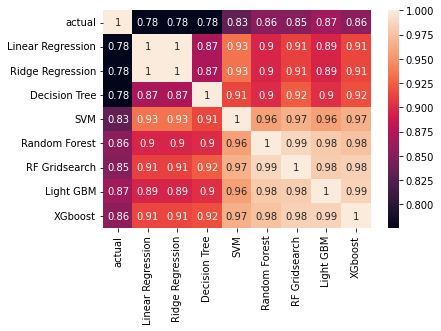

In [ ]:
sns.heatmap(df_1.corr(), annot=True)

From above correlation graph we can see that LightGBM has higher correlation with the actual value of test set which the model has not seen during training.

In [ ]:
model = ['Linear Regression','Ridge Regression','Decision Tree','SVM',
         'Random Forest','RF Gridsearch','Light GBM','XGboost']
rmse = [rmse_1, rmse_2, rmse_3, rmse_4, rmse_5, rmse_5g, rmse_6, rmse_7]
RMSE = pd.DataFrame({'model': model, 'rmse': rmse})

In [ ]:
RMSE

,model,rmse
0,Linear Regression,0.729045
1,Ridge Regression,0.729039
2,Decision Tree,0.727879
3,SVM,0.645653
4,Random Forest,0.598502
5,RF Gridsearch,0.606868
6,Light GBM,0.578426
7,XGboost,0.597532


# Test Predictions

In [ ]:
test = pd.read_csv("drive/MyDrive/testing_data.csv")

In [ ]:
test.isnull().sum()

id            0
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [ ]:
test.shape

(7428, 9)

In [ ]:
test.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,16148,2.2235,12.0,3.967700,1.177003,1457.0,3.633075,34.09,-117.30
1,7213,4.0484,26.0,6.776596,1.038298,1816.0,3.836257,34.28,-118.74
2,23067,2.3571,20.0,3.621701,1.074380,2919.0,1.554825,37.36,-121.89
3,28335,1.7552,30.0,2.342071,1.093834,1327.0,3.065442,34.05,-118.29
4,33439,2.5754,52.0,3.136150,1.166667,870.0,1.890476,37.78,-122.42


In [ ]:
test=test.drop(['id'], axis=1)

In [ ]:
test=sc.fit_transform(test)

In [ ]:
test_prediction=model_6.predict(test)

In [ ]:
test_prediction

array([1.05304129, 1.98190051, 2.1339169 , ..., 3.54673103, 4.98995073,
       1.88532741])

In [ ]:
pd.DataFrame({'MedHouseVal':test_prediction})

,MedHouseVal
0,1.053041
1,1.981901
2,2.133917
3,1.935363
4,3.184215
...,...
7423,1.531551
7424,0.813874
7425,3.546731
7426,4.989951
